## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(['EIN', 'NAME'], axis=1, inplace=True)
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [3]:
# Determine the number of unique values in each column.
app_cat = application_df.dtypes.index.tolist()
application_df[app_cat].nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
app_type_count = application_df['APPLICATION_TYPE'].value_counts()
app_type_count

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [5]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
#  YOUR CODE GOES HERE
application_types_to_replace = list(app_type_count[app_type_count < 600].index)

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
Other      804
T8         737
T7         725
Name: APPLICATION_TYPE, dtype: int64

In [6]:
# Look at CLASSIFICATION value counts for binning
class_count = application_df['CLASSIFICATION'].value_counts()
class_count.head(20)

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
Name: CLASSIFICATION, dtype: int64

In [7]:
# You may find it helpful to look at CLASSIFICATION value counts >1
application_df['CLASSIFICATION'].value_counts().loc[lambda x : x >1]

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [8]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(class_count[class_count < 300].index)


# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: CLASSIFICATION, dtype: int64

In [9]:
# Convert categorical data to numeric with `pd.get_dummies`
numeric_app_df = pd.get_dummies(application_df)
numeric_app_df

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34295,1,5000,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34296,1,5000,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34297,1,5000,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [10]:
# Split our preprocessed data into our features and target arrays
y = numeric_app_df["IS_SUCCESSFUL"]
X = numeric_app_df.drop(["IS_SUCCESSFUL"],axis=1)

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [11]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Model_2 Adding a hidden layer

In [26]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 9
hidden_nodes_layer2 = 18
hidden_nodes_layer3 = 27

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 9)                 396       
                                                                 
 dense_9 (Dense)             (None, 18)                180       
                                                                 
 dense_10 (Dense)            (None, 27)                513       
                                                                 
 dense_11 (Dense)            (None, 1)                 28        
                                                                 
Total params: 1,117
Trainable params: 1,117
Non-trainable params: 0
_________________________________________________________________


In [28]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [29]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5927 - accuracy: 0.7079
Epoch 2/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5639 - accuracy: 0.7281
Epoch 3/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5572 - accuracy: 0.7301
Epoch 4/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5547 - accuracy: 0.7310
Epoch 5/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5523 - accuracy: 0.7314
Epoch 6/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5509 - accuracy: 0.7322
Epoch 7/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5496 - accuracy: 0.7324
Epoch 8/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5495 - accuracy: 0.7325
Epoch 9/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5483 - accuracy: 0.7318
Epoch 10/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5477 - accura

804/804 [==============================] - 1s 2ms/step - loss: 0.5413 - accuracy: 0.7372
Epoch 82/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5408 - accuracy: 0.7378
Epoch 83/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5411 - accuracy: 0.7376
Epoch 84/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5406 - accuracy: 0.7374
Epoch 85/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5410 - accuracy: 0.7379
Epoch 86/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5411 - accuracy: 0.7369
Epoch 87/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5408 - accuracy: 0.7383
Epoch 88/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5408 - accuracy: 0.7372
Epoch 89/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5408 - accuracy: 0.7372
Epoch 90/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5404 - accuracy: 

In [30]:
#Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5492 - accuracy: 0.7269 - 455ms/epoch - 2ms/step
Loss: 0.5492256283760071, Accuracy: 0.7268804907798767


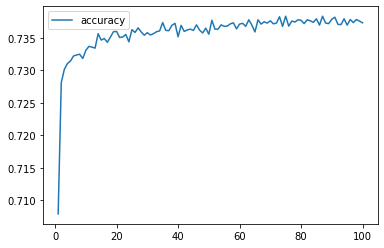

In [31]:
#plotting the accuracy
history_df = pd.DataFrame(fit_model.history, index = range(1, len(fit_model.history['loss'])+1))
history_df.plot(y = 'accuracy')

In [33]:
# Export our model to HDF5 file
nn.save('Models/AlphabetSoupCharity2.h5')

# Attempt #2
RESULT:
APPLICATION_TYPE cutoff = 600
CLASSIFICATION cutoff = 300
layer1 = 9 : activation function = relu
layer2 = 18 : activation function = relu
layer3 = 27 : activation function = relu

Loss: 0.5492256283760071, Accuracy: 0.7268804907798767

A loss value of 55 indicates that the model can be further optimized.
The accuracy percent shows that 72% of the model's predicted values align with the true values in the original dataset.

# Attempt #3 -- changing the activation functions

In [34]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 9
hidden_nodes_layer2 = 18
hidden_nodes_layer3 = 27

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="tanh"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 9)                 396       
                                                                 
 dense_13 (Dense)            (None, 18)                180       
                                                                 
 dense_14 (Dense)            (None, 27)                513       
                                                                 
 dense_15 (Dense)            (None, 1)                 28        
                                                                 
Total params: 1,117
Trainable params: 1,117
Non-trainable params: 0
_________________________________________________________________


In [35]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [36]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5873 - accuracy: 0.7035
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5589 - accuracy: 0.7270
Epoch 3/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5557 - accuracy: 0.7284
Epoch 4/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5543 - accuracy: 0.7290
Epoch 5/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5529 - accuracy: 0.7295
Epoch 6/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5522 - accuracy: 0.7294
Epoch 7/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5514 - accuracy: 0.7298
Epoch 8/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5512 - accuracy: 0.7296
Epoch 9/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5503 - accuracy: 0.7311
Epoch 10/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5496 - accura

804/804 [==============================] - 1s 2ms/step - loss: 0.5401 - accuracy: 0.7378
Epoch 82/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5402 - accuracy: 0.7378
Epoch 83/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5404 - accuracy: 0.7379
Epoch 84/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5398 - accuracy: 0.7385
Epoch 85/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5401 - accuracy: 0.7386
Epoch 86/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5396 - accuracy: 0.7383
Epoch 87/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5397 - accuracy: 0.7378
Epoch 88/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5399 - accuracy: 0.7388
Epoch 89/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5399 - accuracy: 0.7387
Epoch 90/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5400 - accuracy: 

In [37]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5520 - accuracy: 0.7262 - 472ms/epoch - 2ms/step
Loss: 0.5520445108413696, Accuracy: 0.7261807322502136


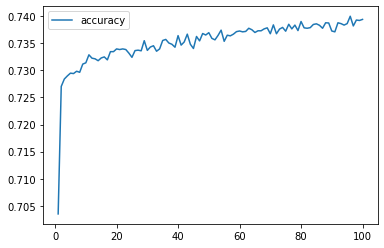

In [38]:
# plotting the accuracy
history_df = pd.DataFrame(fit_model.history, index = range(1, len(fit_model.history['loss'])+1))
history_df.plot(y = 'accuracy')

In [39]:
# Export our model to HDF5 file
nn.save('Models/AlphabetSoupCharity3.h5')

# Attempt #3
RESULT
APPLICATION_TYPE cutoff = 600
CLASSIFICATION cutoff = 300
layer1 = 9 : activation function = relu
layer2 = 18 : activation function = tanh
layer3 = 27 : activation function = tanh

Loss: 0.5520445108413696, Accuracy: 0.7261807322502136


A loss value of 55 indicates that the model can be further optimized.
The accuracy percent shows that 72% of the model's predicted values align with the true values in the original dataset.

Still not at 75% accuracy. 

ALSO RUN WITH APPLICATION_TYPE cutoff = 600
CLASSIFICATION cutoff = 300
layer1 = 12
layer2 = 24
layer3 = 36

In [40]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 12
hidden_nodes_layer2 = 24
hidden_nodes_layer3 = 36

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 12)                528       
                                                                 
 dense_17 (Dense)            (None, 24)                312       
                                                                 
 dense_18 (Dense)            (None, 36)                900       
                                                                 
 dense_19 (Dense)            (None, 1)                 37        
                                                                 
Total params: 1,777
Trainable params: 1,777
Non-trainable params: 0
_________________________________________________________________


In [41]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [42]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5960 - accuracy: 0.7002
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5583 - accuracy: 0.7297
Epoch 3/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5542 - accuracy: 0.7296
Epoch 4/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5513 - accuracy: 0.7321
Epoch 5/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5495 - accuracy: 0.7322
Epoch 6/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5490 - accuracy: 0.7332
Epoch 7/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5484 - accuracy: 0.7336
Epoch 8/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5475 - accuracy: 0.7345
Epoch 9/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5474 - accuracy: 0.7348
Epoch 10/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5469 - accura

804/804 [==============================] - 1s 2ms/step - loss: 0.5384 - accuracy: 0.7385
Epoch 82/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5379 - accuracy: 0.7394
Epoch 83/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5381 - accuracy: 0.7396
Epoch 84/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5379 - accuracy: 0.7400
Epoch 85/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5382 - accuracy: 0.7393
Epoch 86/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5379 - accuracy: 0.7403
Epoch 87/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5376 - accuracy: 0.7390
Epoch 88/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5377 - accuracy: 0.7381
Epoch 89/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5381 - accuracy: 0.7383
Epoch 90/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5381 - accuracy: 

In [43]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5554 - accuracy: 0.7254 - 464ms/epoch - 2ms/step
Loss: 0.5554372668266296, Accuracy: 0.7253644466400146


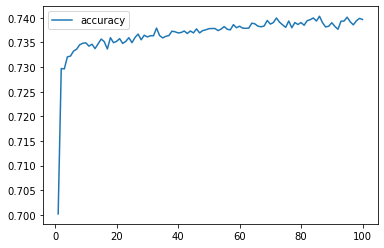

In [44]:
# plotting the accuracy
history_df = pd.DataFrame(fit_model.history, index = range(1, len(fit_model.history['loss'])+1))
history_df.plot(y = 'accuracy')